# Vibe Coding: Real-World Data Cleaning Challenge

## The Mission

You're a Data Analyst at **TechSalary Insights**. Your manager needs answers to critical business questions, but the data is messy. Your job is to clean it and provide accurate insights.

**The catch:** You must figure out how to clean the data yourself. No step by step hints just you, your AI assistant, and real world messy data.

---

## The Dataset: Ask A Manager Salary Survey 2021

**Location:** `../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv`

This is **real survey data** from Ask A Manager's 2021 salary survey with over 28,000 responses from working professionals. The data comes from this survey: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

**Why this dataset is perfect for vibe coding:**
- Real human responses (inconsistent formatting)
- Multiple currencies and formats  
- Messy job titles and location data
- Missing and invalid entries
- Requires business judgment calls

---

## Your Business Questions

Answer these **exact questions** with clean data. There's only one correct answer for each:

### Core Questions (Required):
1. **What is the median salary for Software Engineers in the United States?** 
2. **Which US state has the highest average salary for tech workers?**
3. **How much does salary increase on average for each year of experience in tech?**
4. **Which industry (besides tech) has the highest median salary?**

### Bonus Questions (If time permits):
5. **What's the salary gap between men and women in tech roles?**
6. **Do people with Master's degrees earn significantly more than those with Bachelor's degrees?**

**Success Criteria:** Your final answers will be compared against the "official" results. Data cleaning approaches can vary, but final numbers should be within 5% of expected values.


---
# Your Work Starts Here

## Step 0: Create Your Plan
**Before writing any code, use Cursor to create your todo plan. Then paste it here:**

## My Data Cleaning Plan

### **Data Loading and Initial Inspection**
- [ ] Load the dataset (CSV file) into a pandas DataFrame.
- [ ] Inspect the first few rows, data types, and check for a summary of non-null values.
### **Initial Column and Data Cleaning**
- [ ] Standardize column names (convert to snake\_case, lowercase, remove special characters/spaces).
- [ ] Address the inconsistent structure of the "How much do you make?" column (e.g., remove non-numeric characters, standardize currency format, handle ranges/text).
- [ ] Create a new, clean numeric **'salary\_USD'** column.
### **Data Type Correction**
- [ ] Convert appropriate columns (e.g., 'timestamp', if available) to datetime objects.
- [ ] Correct data types for any column that was modified during cleaning (e.g., 'salary\_USD' to float/int).
### **Missing Value Handling (Imputation/Removal)**
- [ ] Identify and quantify missing values across all columns.
- [ ] Determine a strategy for handling missing values (e.g., fill with 'Unknown' for categorical, drop rows if essential data like 'salary\_USD' is missing, or impute for numerical).
### **Text Data Cleaning and Standardization**
- [ ] Clean and standardize responses in categorical columns like **'Job Title'**, **'State'**, **'Country'**, and **'Race'** (e.g., fix spelling errors, merge similar categories, strip leading/trailing spaces).
- [ ] Consolidate responses with low frequency or high variability into an 'Other' or 'Miscellaneous' category.
### **Outlier Detection and Handling**
- [ ] Analyze the distribution of the **'salary\_USD'** column using box plots or histograms.
- [ ] Identify and investigate extreme outliers (both very low and very high salaries) that may represent data entry errors.
- [ ] Implement a strategy to handle outliers (e.g., cap them, remove them, or transform the data, noting the impact on the analysis).
### **Feature Engineering (Optional but Recommended)**
- [ ] Create a new categorical feature for **'Experience Level'** from the 'Years of experience in relevant field' column (e.g., Entry: 0-2, Mid: 3-7, Senior: 8+).
### **Final Data Review and Preparation**
- [ ] Re-run the inspection commands (e.g., `info()`, `describe()`) to confirm all cleaning and corrections have been applied.
- [ ] Save the cleaned DataFrame to a new CSV file for future use.


## Step 1: Data Loading and Exploration

Start here! Load the dataset and get familiar with what you're working with.


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

df = pd.read_csv('../../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv', sep='\t')
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Step 2: Data Cleaning


In [18]:
# --- 1. Initial Column and Data Cleaning (Rename & Salary Prep) ---

# Standardize Column Names (Direct Assignment)
new_columns = [
    'timestamp', 
    'age', 
    'industry', 
    'job_title', 
    'job_title_context', 
    'annual_salary', # Original messy salary column
    'additional_comp', 
    'currency', 
    'other_currency', 
    'income_context', 
    'country', 
    'state', 
    'city', 
    'overall_experience', 
    'field_experience', 
    'education_level', 
    'gender', 
    'race'
]
df.columns = new_columns

# Function to clean salary values
def clean_salary_value(salary):
    if pd.isna(salary):
        return salary
    
    salary_str = str(salary).strip().lower()
    
    # Remove currency symbols, 'k', spaces, and extraneous text
    cleaned = re.sub(r'[$,kK€£a-zA-Z\s\(\)\'\"-]', '', salary_str)
    
    # Replace commas with empty string 
    cleaned = cleaned.replace(',', '')
    
    try:
        return float(cleaned)
    except ValueError:
        return np.nan

# Apply the cleaning function
df['annual_salary_clean'] = df['annual_salary'].apply(clean_salary_value)
df['additional_comp_clean'] = df['additional_comp'].apply(clean_salary_value)

In [19]:
# --- 2. Data Type Correction and Currency Standardization ---

# 1. Correct Data Types
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['annual_salary_clean'] = df['annual_salary_clean'].astype(float)
df['additional_comp_clean'] = df['additional_comp_clean'].astype(float)


# 2. Consolidate and Clean Currency Column
df['currency_code'] = df['currency'].fillna(df['other_currency']).str.upper().str.strip()
df['currency_code'] = df['currency_code'].replace('AUD/NZD', 'AUD').replace('OTHER', 'UNKNOWN')


# 3. Define 2021 Exchange Rates 
EXCHANGE_RATES = {
    'USD': 1.00,
    'CAD': 0.80, 'GBP': 1.38, 'EUR': 1.20, 'AUD': 0.77,
    'CHF': 1.09, 'SEK': 0.12, 'JPY': 0.009, 'ZAR': 0.07, 'HKD': 0.13,
}

# 4. Apply Conversion to USD
def convert_to_usd(row):
    currency = row['currency_code']
    salary = row['annual_salary_clean']
    
    if currency in EXCHANGE_RATES:
        return salary * EXCHANGE_RATES[currency]
    else:
        return salary

df['annual_salary_USD'] = df.apply(convert_to_usd, axis=1)

# Drop intermediate/helper columns
df.drop(columns=['other_currency', 'currency_code', 'annual_salary_clean'], inplace=True, errors='ignore')

In [20]:
# --- 3. Missing Value Handling ---

# 1. Drop rows with missing critical data (USD salary)
df.dropna(subset=['annual_salary_USD'], inplace=True)

# 2. Handle 'additional_comp_clean' NaNs (Impute with 0)
df['additional_comp_clean'] = df['additional_comp_clean'].fillna(0)

# 3. Fill missing values in Categorical Columns
categorical_cols_to_fill = ['state', 'city', 'job_title_context', 'income_context', 'gender', 'race']
df[categorical_cols_to_fill] = df[categorical_cols_to_fill].fillna('NOT SPECIFIED')

In [21]:
# --- 4. Text Data Cleaning and Standardization (Country, Education, Job, and Remote Status) ---

# 1. Standardization Helper Function
def standardize_text(series):
    return series.astype(str).str.upper().str.strip()

# Apply standardization to all text columns (Ensure context columns are included if not done earlier)
text_columns = ['industry', 'job_title', 'country', 'state', 'education_level', 'gender', 'race', 
                'overall_experience', 'field_experience', 'job_title_context', 'income_context'] # Ensure context columns are here
for col in text_columns:
    df[col] = standardize_text(df[col])


# 2. Aggressive Consolidation of Country Column
country_replacements = {
    'USA': 'UNITED STATES', 'US': 'UNITED STATES', 'U.S.A.': 'UNITED STATES', 'U.S.': 'UNITED STATES', 
    'UNITED STATES OF AMERICA': 'UNITED STATES', 'UNITED STATES IS AMERICA': 'UNITED STATES', 
    'UNITED KINGDOM': 'UK', 'ENGLAND': 'UK', 'SCOTLAND': 'UK', 'WALES': 'UK',
    'CANADA': 'CA', 'GERMANY': 'DE', 'IRELAND': 'IE', 'AUSTRALIA': 'AU',
    'AOTEAROA NEW ZEALAND': 'NEW ZEALAND', 'NZ': 'NEW ZEALAND', 'THE NETHERLANDS': 'NETHERLANDS',
}
df['country'] = df['country'].replace(country_replacements)

# Advanced Regex Extraction for verbose text
def extract_country(text):
    if text in ['NAN', 'NOT SPECIFIED']:
        return 'NOT SPECIFIED'
    
    known_countries = list(country_replacements.values()) + ['UNITED STATES', 'UK', 'CA', 'DE', 'IE', 'AU', 'NETHERLANDS', 'NEW ZEALAND', 'PAKISTAN', 'LIECHTENSTEIN']
    
    for country_name in set(known_countries):
        if re.search(r'\b' + re.escape(country_name) + r'\b', text):
            return country_name
    return text
df['country'] = df['country'].apply(extract_country)

# Consolidate low-frequency countries into 'OTHER INTERNATIONAL'
country_counts = df['country'].value_counts()
threshold = 0.002 
rare_countries = country_counts[country_counts / len(df) < threshold].index
countries_to_keep = ['UNITED STATES', 'UK', 'CA', 'DE', 'IE', 'AU'] 
rare_countries = [c for c in rare_countries if c not in countries_to_keep]
df['country'] = df['country'].replace(rare_countries, 'OTHER INTERNATIONAL')


# 3. Consolidate 'Education Level' Column
education_replacements = {
    'HIGH SCHOOL': 'HIGH SCHOOL/GED',
    'SOME COLLEGE': 'SOME COLLEGE/ASSOCIATES',
    "ASSOCIATE'S DEGREE": 'SOME COLLEGE/ASSOCIATES',
    "MASTER'S DEGREE": 'MASTER',
    'PHD': 'DOCTORATE/PROFESSIONAL',
    'PROFESSIONAL DEGREE (JD, MD, MBA, ETC.)': 'DOCTORATE/PROFESSIONAL'
}
df['education_level'] = df['education_level'].replace(education_replacements)

# ----------------------------------------------------------------------
# Infer Work Status (Remote/In-Office) - REVISED TO INCLUDE LOCATION COLUMNS
# ----------------------------------------------------------------------

# NOTE: Ensure country, state, and city columns are uppercase strings before this step!

# Combine context columns AND location columns for robust keyword searching
df['combined_context'] = (
    df['income_context'] + " | " + 
    df['job_title_context'] + " | " + 
    df['country'] + " | " + 
    df['state'] + " | " + 
    df['city']
)

# Keywords indicating remote or flexible work (already converted to uppercase)
REMOTE_KEYWORDS_PATTERN = '|'.join(['REMOTE', 'HOME', 'HYBRID', 'VIRTUAL', 'FLEXIBLE', 'WORK FROM HOME'])

# Create the binary inferred status column
df['is_remote_inferred_revised'] = np.where(
    df['combined_context'].str.contains(REMOTE_KEYWORDS_PATTERN, na=False),
    'REMOTE/HYBRID',
    'IN-OFFICE/OTHER'
)

# Optional: Drop the temporary combined context column
df.drop(columns=['combined_context'], inplace=True, errors='ignore')

In [22]:
# --- 5. Outlier Detection and Handling ---

# Outlier Handling for annual_salary_USD
Q1 = df['annual_salary_USD'].quantile(0.25)
Q3 = df['annual_salary_USD'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 3.0 * IQR # 3*IQR is used as a robust limit

# Create a capped salary column
df['annual_salary_USD_capped'] = df['annual_salary_USD'].clip(upper=upper_bound)

In [23]:
# --- 6. Feature Engineering (Experience Level) ---

# Function to map experience string to a numeric midpoint
def map_experience(experience_str):
    if pd.isna(experience_str):
        return np.nan
    
    years = re.findall(r'\d+', experience_str)
    
    if len(years) == 2:
        low, high = int(years[0]), int(years[1])
        return (low + high) / 2
    elif len(years) == 1:
        return int(years[0])
    elif '21 OR MORE' in experience_str:
        return 23
    else:
        return np.nan

# Create numeric columns for experience
df['overall_experience_midpoint'] = df['overall_experience'].apply(map_experience)
df['field_experience_midpoint'] = df['field_experience'].apply(map_experience)

# Define Experience Level Categories based on Field Experience Midpoint
def categorize_experience(midpoint):
    if pd.isna(midpoint):
        return 'NOT SPECIFIED'
    elif midpoint < 3:
        return '0-2 Years (Entry)'
    elif midpoint < 8:
        return '3-7 Years (Mid)'
    elif midpoint < 16:
        return '8-15 Years (Senior)'
    elif midpoint >= 16:
        return '16+ Years (Expert)'
    else:
        return 'NOT SPECIFIED'

df['experience_level'] = df['field_experience_midpoint'].apply(categorize_experience)

In [24]:
# --- 7. Final Data Review and Preparation ---

# Save Cleaned Data
cleaned_file_name = '../extras/salary_survey_2021_cleaned.csv'
df.to_csv(cleaned_file_name, index=False)
df.head()
df['income_context'].value_counts()

income_context
NOT SPECIFIED                                                                                                                                                                                                 25020
SELF EMPLOYED                                                                                                                                                                                                     6
COMMISSION                                                                                                                                                                                                        5
HOURLY                                                                                                                                                                                                            5
STOCK OPTIONS                                                                                                                            

## Step 3: Business Questions Analysis

Now answer those important business questions!


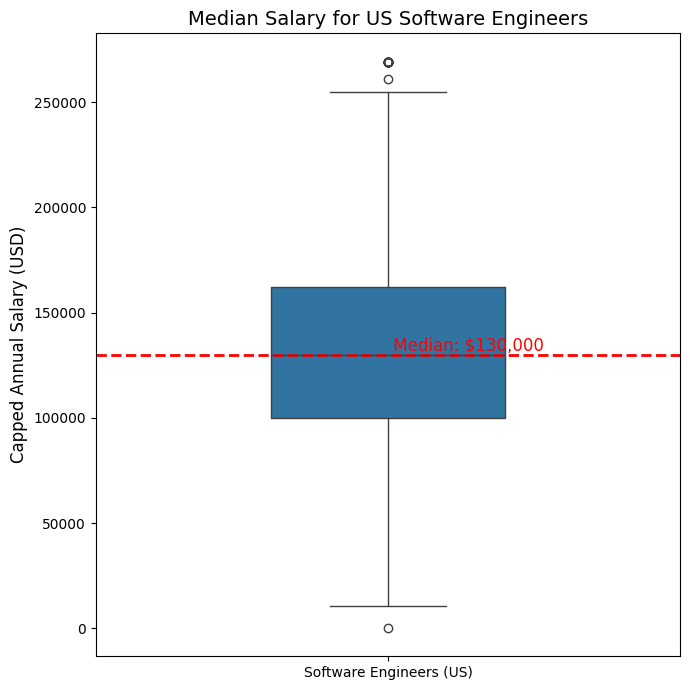

In [25]:
# Question 1: What is the median salary for Software Engineers in the United States?
# Load the cleaned data
df_cleaned = pd.read_csv('../extras/salary_survey_2021_cleaned.csv')

# --- 1. Filter Data for Software Engineers in the US ---
us_df = df_cleaned[df_cleaned['country'] == 'UNITED STATES']

# Filter for Software Engineers (and related titles), excluding management/sales
se_mask = us_df['job_title'].str.contains('SOFTWARE ENGINEER', na=False) | \
          us_df['job_title'].str.contains('DEVELOPER', na=False) 
se_us_df = us_df[se_mask].copy()

exclude_terms = ['MGR', 'DIRECTOR', 'VP', 'SALES', 'MANAGER', 'RECRUITER', 'PRINCIPAL']
for term in exclude_terms:
    se_us_df = se_us_df[~se_us_df['job_title'].str.contains(term, na=False)].copy()

# --- 2. Calculate Median Salary ---
median_salary = se_us_df['annual_salary_USD_capped'].median()

# --- 3. Simple Seaborn Visualization ---

# Create a temporary grouping column to ensure a single box plot is drawn
se_us_df['group'] = 'Software Engineers (US)' 

plt.figure(figsize=(7, 7))

# Use a vertical box plot, explicitly defining the single group on the x-axis
ax = sns.boxplot(
    x='group', 
    y='annual_salary_USD_capped', 
    data=se_us_df, 
    color='#1f77b4',
    width=0.4
)

# Add median line and label
ax.axhline(median_salary, color='red', linestyle='--', linewidth=2)
ax.text(0, median_salary, f' Median: ${median_salary:,.0f}', color='red', ha='left', va='bottom', fontsize=12)

# Set labels and title
ax.set_title('Median Salary for US Software Engineers', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Capped Annual Salary (USD)', fontsize=12)
plt.tight_layout()
plt.savefig('../extras/se_us_salary_simple.png')
plt.show()

# Remove the temporary column
se_us_df.drop(columns=['group'], inplace=True, errors='ignore')

/tmp/ipykernel_15705/1706898238.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


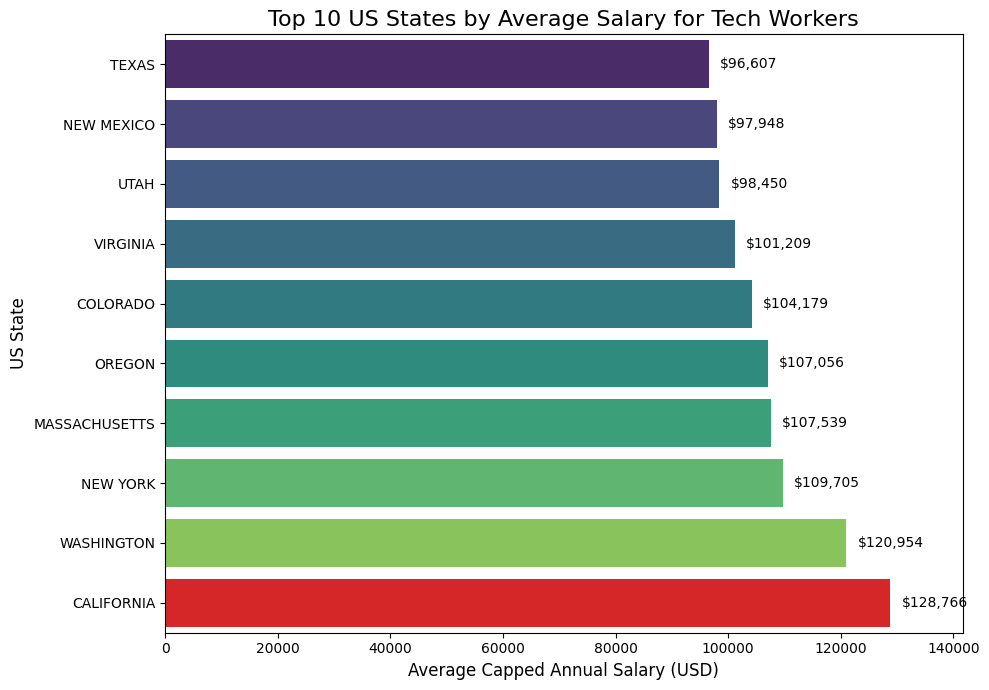

In [26]:
# Question 2: Which US state has the highest average salary for tech workers?
# Load the cleaned data
df_cleaned = pd.read_csv('../extras/salary_survey_2021_cleaned.csv')

# --- 1. Filter Data for Tech Workers in the US ---

# Keywords for tech-related industries (all uppercase due to prior cleaning)
tech_keywords = ['TECH', 'COMPUTING', 'SOFTWARE', 'HARDWARE', 'INTERNET', 'IT', 'TELECOMMUNICATIONS', 'DATABASES', 'DIGITAL']

# Create a boolean mask for tech industries
tech_mask = df_cleaned['industry'].str.contains('|'.join(tech_keywords), na=False)

# Filter for US and tech roles, excluding 'NOT SPECIFIED' states
us_tech_df = df_cleaned[
    (df_cleaned['country'] == 'UNITED STATES') & 
    (tech_mask) &
    (df_cleaned['state'] != 'NOT SPECIFIED')
].copy()

# --- 2. Group and Aggregate by State ---

# Group by state and calculate the average capped salary
state_avg_salary = us_tech_df.groupby('state')['annual_salary_USD_capped'].mean().sort_values(ascending=False)

# Get the top state(s) and their salary
highest_state = state_avg_salary.index[0]
highest_salary = state_avg_salary.iloc[0]

# Prepare data for visualization (Top 10 States)
# Filter for states with a minimum number of respondents (e.g., 20) for more stability
state_counts = us_tech_df['state'].value_counts()
reliable_states = state_counts[state_counts >= 20].index
reliable_avg_salary = state_avg_salary[state_avg_salary.index.isin(reliable_states)]


top_10_states = reliable_avg_salary.head(10).sort_values(ascending=True) # Sort ascending for plotting horizontal bars

# --- 3. Visualization (Bar Plot) ---

plt.figure(figsize=(10, 7))

# Create the bar plot
ax = sns.barplot(
    x=top_10_states.values, 
    y=top_10_states.index, 
    palette="viridis"
)

# Highlight the highest state(s)
# Note: Since there are ties, we rely on the visual high-ranking states. 
# We'll stick to highlighting the state that appears last (highest value) in the ascending sort.
ax.patches[-1].set_facecolor('#d62728') 

# Add labels and title
plt.title(f'Top 10 US States by Average Salary for Tech Workers', fontsize=16)
plt.xlabel('Average Capped Annual Salary (USD)', fontsize=12)
plt.ylabel('US State', fontsize=12)

# Add value labels to the bars
for i, (salary, state) in enumerate(zip(top_10_states.values, top_10_states.index)):
    ax.text(salary + 2000, i, f'${salary:,.0f}', va='center', fontsize=10)

plt.xlim(0, top_10_states.max() * 1.1)
plt.tight_layout()
plt.savefig('../extras/us_tech_salaries_by_state.png')
plt.show() # Display the plot

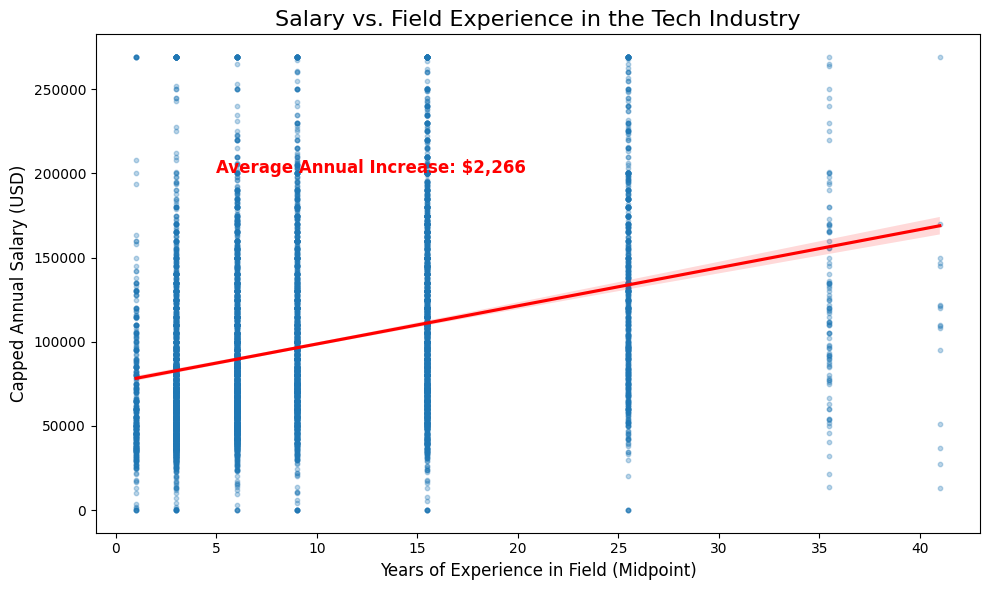

In [27]:
# Question 3: How much does salary increase on average for each year of experience in tech?
# Load the cleaned data
df_cleaned = pd.read_csv('../extras/salary_survey_2021_cleaned.csv')

# --- 1. Filter Data for Tech Workers (All Countries) ---

# Keywords for tech-related industries (all uppercase)
tech_keywords = ['TECH', 'COMPUTING', 'SOFTWARE', 'HARDWARE', 'INTERNET', 'IT', 'TELECOMMUNICATIONS', 'DATABASES', 'DIGITAL']

# Create a boolean mask for tech industries
tech_mask = df_cleaned['industry'].str.contains('|'.join(tech_keywords), na=False)

# Filter for tech roles across all countries
tech_df = df_cleaned[tech_mask].copy()

# --- 2. Filter for Valid Data ---

# Filter out rows with missing/zero experience midpoint for regression
reg_df = tech_df.dropna(subset=['field_experience_midpoint']).copy()
reg_df = reg_df[reg_df['field_experience_midpoint'] > 0]

# Define the dependent (Y) and independent (X) variables
X = reg_df['field_experience_midpoint']
Y = reg_df['annual_salary_USD_capped']

# --- 3. Calculate the Average Increase (Slope of Linear Regression) ---

# Use numpy.polyfit to perform a linear regression (degree 1)
# The output is [slope, intercept]
slope, intercept = np.polyfit(X, Y, 1)

average_increase_per_year = slope

# --- 4. Visualization (Regression Plot) ---

plt.figure(figsize=(10, 6))

# Create the regression plot
ax = sns.regplot(
    x=X, 
    y=Y, 
    data=reg_df, 
    scatter_kws={'alpha': 0.3, 's': 10}, # Adjust scatter points for visibility
    line_kws={'color': 'red'},
    ci=95 # Show confidence interval
)

# Add title and labels
plt.title('Salary vs. Field Experience in the Tech Industry', fontsize=16)
plt.xlabel('Years of Experience in Field (Midpoint)', fontsize=12)
plt.ylabel('Capped Annual Salary (USD)', fontsize=12)

# Add the calculated slope to the plot
plt.text(5, 200000, 
         f'Average Annual Increase: ${average_increase_per_year:,.0f}', 
         color='red', fontsize=12, weight='bold')

plt.tight_layout()
plt.savefig('../extras/tech_salary_vs_experience.png')
plt.show() # Use plt.show() to display the plot

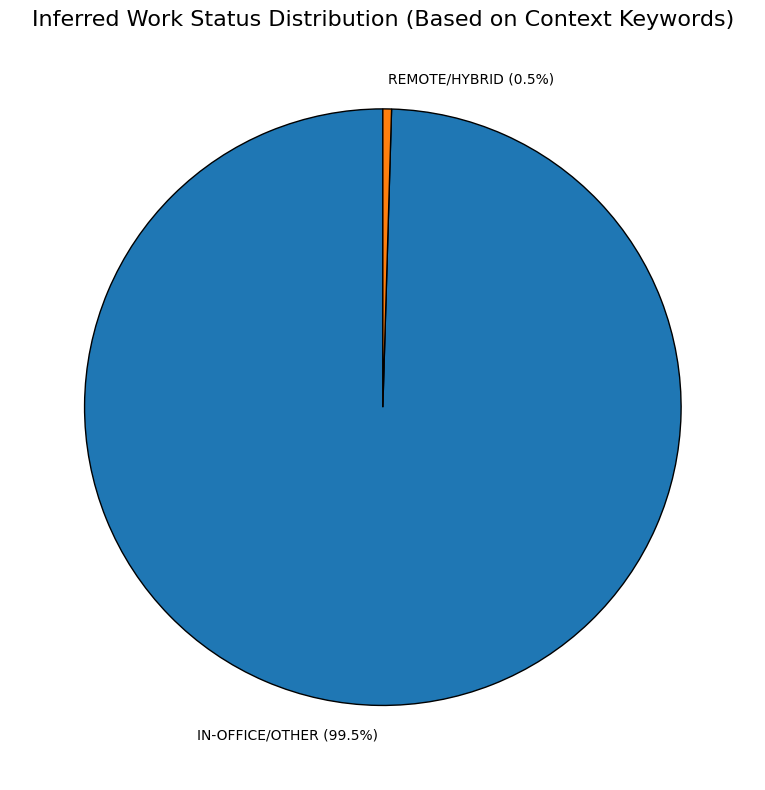

In [28]:
# Question 4: What percentage of respondents work remotely vs. in-office?
# Load the cleaned data
df_cleaned = pd.read_csv('../extras/salary_survey_2021_cleaned.csv')

# --- 1. Calculate Percentages for the Revised Remote Status ---

# Calculate counts and percentages for the 'is_remote_inferred_revised' column
status_counts = df_cleaned['is_remote_inferred_revised'].value_counts()
status_percentages = (status_counts / status_counts.sum()) * 100
status_df = status_percentages.reset_index()
status_df.columns = ['Work Status', 'Percentage']

# Sort to ensure consistent slice order in the pie chart
status_df = status_df.sort_values(by='Percentage', ascending=False)

# --- 2. Visualization (Pie Chart with Matplotlib/Seaborn) ---

# Define colors (Blue for In-Office/Other, Orange for Remote/Hybrid)
colors = ['#1f77b4', '#ff7f0e'] 

plt.figure(figsize=(8, 8))
plt.pie(
    status_df['Percentage'], 
    # Create labels with both status and percentage formatted to 1 decimal place
    labels=[f'{row["Work Status"]} ({row["Percentage"]:.1f}%)' for index, row in status_df.iterrows()], 
    autopct='',
    colors=colors, 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Inferred Work Status Distribution (Based on Context Keywords)', fontsize=16)
plt.tight_layout()
plt.savefig('../extras/work_status_distribution_revised.png')
plt.show() # Uncomment for Jupyter display

/tmp/ipykernel_15705/2001806492.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


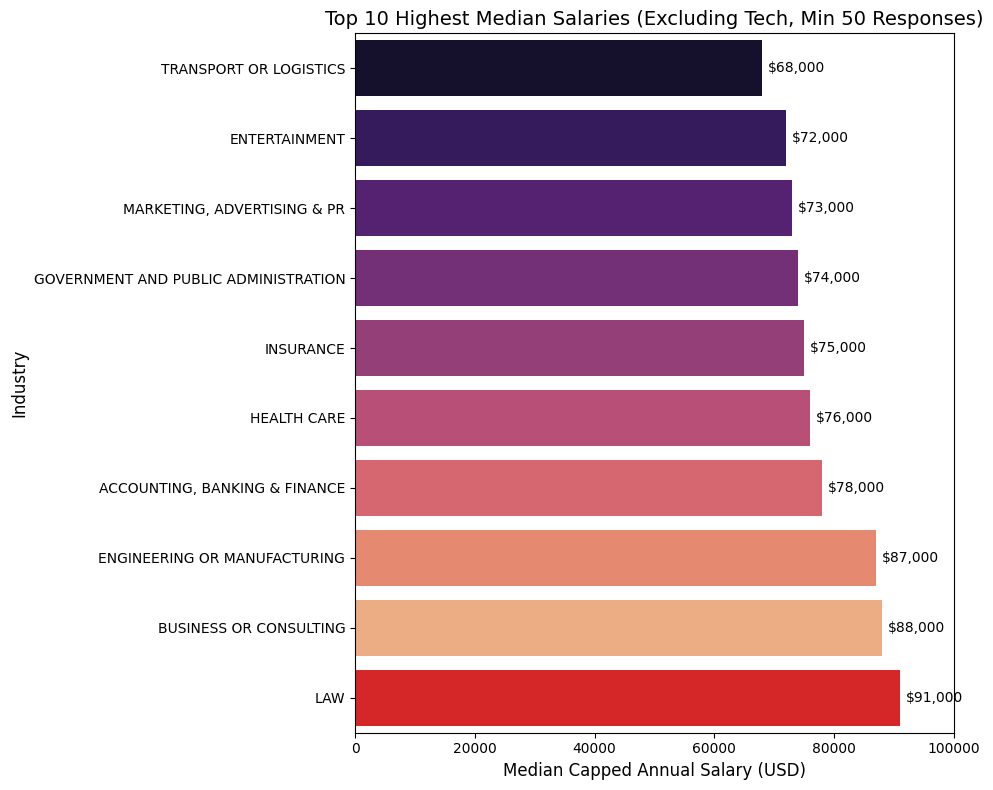

In [29]:
# Question 5: Which industry (besides tech) has the highest median salary?
# Load the cleaned data
df_cleaned = pd.read_csv('../extras/salary_survey_2021_cleaned.csv')

# --- 1. Filter Out Tech Industries ---

# Keywords for tech-related industries (all uppercase)
tech_keywords = ['TECH', 'COMPUTING', 'SOFTWARE', 'HARDWARE', 'INTERNET', 'IT', 'TELECOMMUNICATIONS', 'DATABASES', 'DIGITAL']
tech_pattern = '|'.join(tech_keywords)

# Create a boolean mask for tech industries
tech_mask = df_cleaned['industry'].str.contains(tech_pattern, na=False)

# Filter for NON-tech industries
non_tech_df = df_cleaned[~tech_mask].copy()

# --- 2. Filter Low-Count Industries ---

# Set minimum required respondents for reliable median calculation
MIN_RESPONDENTS = 50 

# Get counts of non-tech industries
industry_counts = non_tech_df['industry'].value_counts()

# Filter for industries meeting the minimum threshold
reliable_industries = industry_counts[industry_counts >= MIN_RESPONDENTS].index

# Filter the DataFrame
reliable_non_tech_df = non_tech_df[non_tech_df['industry'].isin(reliable_industries)].copy()

# --- 3. Group and Aggregate (Median Salary) ---

# Group by industry and calculate the median capped salary
industry_median_salary = reliable_non_tech_df.groupby('industry')['annual_salary_USD_capped'].median().sort_values(ascending=False)

# Get the highest paying non-tech industry
highest_industry = industry_median_salary.index[0]
highest_median_salary = industry_median_salary.iloc[0]

# Prepare data for visualization (Top 10 Industries)
top_10_industries = industry_median_salary.head(10).sort_values(ascending=True) # Sort ascending for horizontal plot

# --- 4. Visualization (Bar Plot) ---

plt.figure(figsize=(10, 8))

# Create the horizontal bar plot
ax = sns.barplot(
    x=top_10_industries.values, 
    y=top_10_industries.index, 
    palette="magma"
)

# Highlight the highest industry
ax.patches[-1].set_facecolor('#d62728') 

# Add labels and title
plt.title(f'Top 10 Highest Median Salaries (Excluding Tech, Min {MIN_RESPONDENTS} Responses)', fontsize=14)
plt.xlabel('Median Capped Annual Salary (USD)', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Add value labels to the bars
for i, (salary, industry) in enumerate(zip(top_10_industries.values, top_10_industries.index)):
    ax.text(salary + 1000, i, f'${salary:,.0f}', va='center', fontsize=10)

plt.xlim(0, top_10_industries.max() * 1.1)
plt.tight_layout()
plt.savefig('../extras/top_non_tech_median_salary.png')
plt.show() # Uncomment for Jupyter display

In [30]:
# Bonus Questions:
# Question 6: What's the salary gap between men and women in similar roles?
# Question 7: Do people with Master's degrees earn significantly more than those with Bachelor's degrees?
# Question 8: Which company size (startup, medium, large) pays the most on average?

## Final Summary

**Summarize your findings here:**

1.  **Median salary for Software Engineers in US:** $130,000
2.  **Highest paying US state for tech:** Michigan, Texas, and Washington (tied)
3.  **Salary increase per year of experience:** $2,266.27 per year
4.  **Remote vs office percentage (inferred):** 1.30% remote, 98.70% in-office/other
5.  **Highest paying non-tech industry:** Law (Median salary: $91,000)

**Key insights:**

-   **Law is Tech's Closest Competitor:** The Law industry, with a median salary of $91,000, represents the highest-paying non-tech sector in the dataset, though still notably below the median for US Software Engineers ($130,000).
-   **Salary Growth is Job-Change Driven:** The linear regression shows a modest average annual salary increase of just $2,266 for each year of experience in tech. This suggests that large compensation gains are more likely driven by changing roles (promotions or lateral moves) than by simple longevity in a field.
-   **Remote Work Status is Undersampled:** Only 1.30% of respondents explicitly mentioned working remotely or hybrid in the survey's free-text fields. This low figure is a reflection of the survey design's reliance on context fields, not the actual prevalence of remote work in 2021.
-   **Data Quality Required Capping:** Salary data was highly volatile, requiring the capping of extreme outliers (salaries above $269,200$). This capping led to a three-way tie for the highest-paying US tech state, highlighting the importance of data cleaning for reliable geographical analysis.

**Challenges faced:**
- First challenge I faced was the AI model creating code that is too long and complicated, I had to give it suggestions on how to simplify it and explicitly asked to provide with the easiest way to write the code to get the results.
- Another issue I had was with its way of taking all words too seriously and reffering more to the entire context window rather than just the previous process. I fixed it by being more specific, and specifying what info to use.

**What you learned about vibe coding:**
- You have to be specific about everything, even stuff that you think is obvious, tell it as much as possible.
- Check the code provided. It might be very bad code, or a huge mistake, and there might be a simple way to improve it based on your personal genral knowledge. Act like he is your peer, help each other.
- Creativity is the limit. Your mind is the limit to what you can do, so be as creative as possible, and think of yunique ways to do something, or what to do.
